# Определение эффективности продаж компьютерных игр 

Для определения ставки на потенциально успешный продукт у нас есть из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель исследования:**  выявить потенциально успешные платформы для будущего планирования рекламных компаний.

Для исследования цели рассмотрим основные гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action  и Sports разные.

**Ход исследования:**
1. Предобработка данных
2. Исследовательский анализ
3. Составить портрет пользователей каждого региона 
4. Проверить основные гипотезы


**Описание данных:**

* `Name` — название игры;
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Справочно:* 

Расшифровка рейтинга
- `E`- Everyone;
- `M` - Mature;
- `T` - Teen;
- `E10+` - Everyone 10 and older;
- `K-A` - Kids to Adults;
- `AO` - Adults Only 18+;
- `EC` - Early childhood;
- `RP` - Rating Pending;

## 1. Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Посмотрим зависимости между нашими данными в датасете:

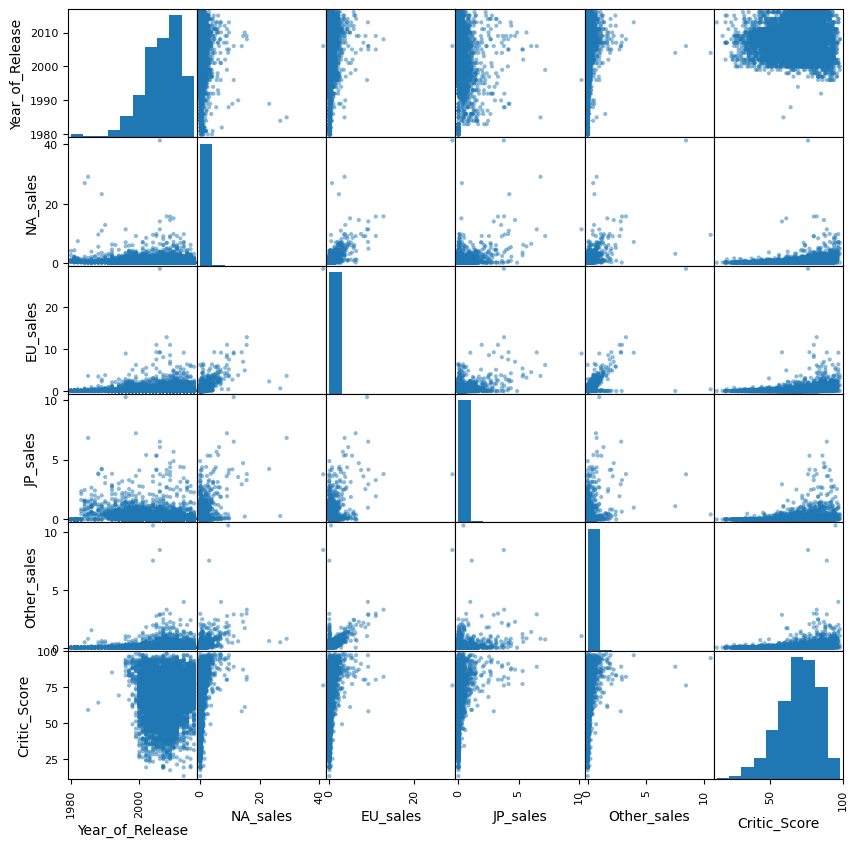

In [3]:
pd.plotting.scatter_matrix(data, figsize=(10, 10)) 
plt.show()

Посмотрим инфо о данных в датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия колонок к нижнему регистру:

In [5]:
data.columns = [col.lower() for col in data.columns]

In [6]:
data.columns #проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изучим данные в столбцах и далее изменим тип данных, если это будет необходимо:

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изменим тип данных с object на числовой `year_of_release`т.к. это год и он не может быть дробным числом и `user_score` , т.к. это оценка пользователей и она должна быть количественная. 

Сначала проверим, какие у нас данные в выбранных столбцах:

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

в данных видим `tbd` аббревитатура от  `to be determined`,  заменим неопределенные объекты на Nan

In [9]:
data.loc[data['user_score'] == 'tbd' , 'user_score'] = np.nan

In [10]:
data['user_score'].unique() #проверка

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Теперь изменим тип данных:

In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64') 
data['user_score'] = data['user_score'].astype('float64')

Далее рассмотрим пропуски в данных:

In [13]:
pd.DataFrame(data.isna().sum()).style.background_gradient('coolwarm')


,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,9125


Видим большое количество пропусков в последних 3 столбцах: `critic_score` , `user_score` и `rating` . Данные пропуски вероятнее всего относятся к типу  MNAR (Missing Not At Random) и пока ничего не будем делать с данными столбцами. 

Единственное, мы обратимся к столбцу `rating`. И, т.к. мы видим в этом столбце категориальные значения, заменим `Nan` на `unknown`, чтобы не терялись данные

Возможной причиной образования  пропусков по `rating`  является отсутствие информации, например, рейтинг по отдельным играм был  произведен по другой классификации и не попал в данный датасет. 

In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
data['rating'] = data['rating'].fillna('unknown')

In [16]:
data['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

В ходе изучения рейтинга было обнаружено, что`Kids to Adults`  был заменён на `Everyone` с 1 января 1998 года. Объеденим данные `E` и `K-A` в нашем датасете для дальнейшего анализа.


In [17]:
data['rating'] = data['rating'].replace('K-A', 'E')

Удалим малочисленные категории:

In [18]:
data = data.query("rating not in ['EC','RP','AO']")

In [19]:
data['rating'].value_counts()#проверка

unknown    6766
E          3993
T          2961
M          1563
E10+       1420
Name: rating, dtype: int64

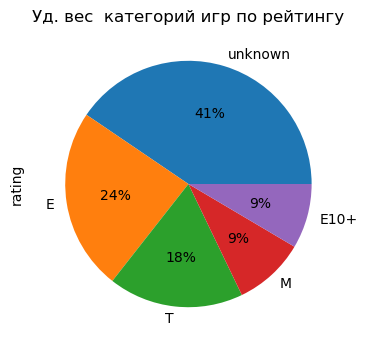

In [20]:
data['rating'].value_counts().plot(kind = 'pie', figsize = (4,4), title = 'Уд. вес  категорий игр по рейтингу',autopct='%1.0f%%' )
plt.show()

Как видно из диаграммы, 40% от датафрейма у нас с неизвестным рейтингом, следующие 24% идут игры для всех, 18% для подростков и т.д. 

Далее удалим из таблицы пропуски в столбце `year_of_release`, `name`, `genre`  т.к. выявить причину образования пропусков или заполнить самостоятельно не предсталяется возможным. Данные составляют 1,6% датасета , что не повлияет на полноту выборки.

In [21]:
data = data.dropna(subset=['year_of_release','name','genre']) 

Проверим на явные дубликаты:

In [22]:
data.duplicated().sum()

0

Проверим на не явные дубликаты жанры игр:

In [23]:
for i in data['genre'].unique():
    print([i])

['Sports']
['Platform']
['Racing']
['Role-Playing']
['Puzzle']
['Misc']
['Shooter']
['Simulation']
['Action']
['Fighting']
['Adventure']
['Strategy']


Добавим столбец суммарных продаж во всех регионах:

In [24]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [25]:
data.head() #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Вывод:** Изучив данные мы увидели большое количество пропусков в оценках как пользователей так и критиков, образование данных пропусков может быть по любой из возможных причин : 
- например, игра только вышла либо оценивалась на одном ресурсе, а  агрегированную выгрузку делали из другого источника.
- рейтинг выставлялся другой компанией.

В целом, отсутствие оценок не повлияют на ход нашего анализа, т.к. мы преследуем другие цели исследования.

Предобратка даных завершена, данные  в досточном количестве и они готовы к дальнейшей аналитике. 

## 2. Исследовательский анализ

Рассмотрим, сколько игр выпускалось в разные годы:

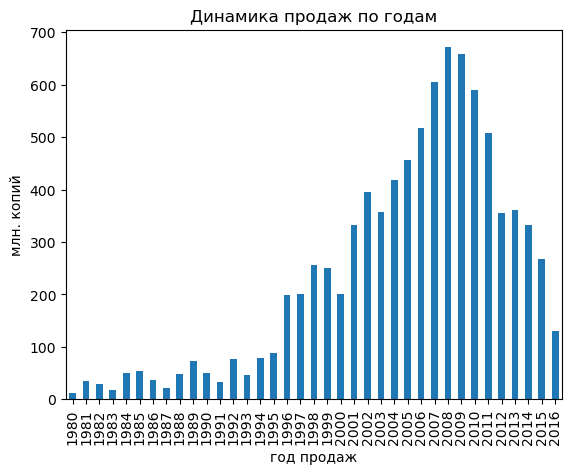

In [26]:
data.groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', title = 'Динамика продаж по годам' )
plt.xlabel('год продаж')
plt.ylabel('млн. копий')
plt.show()

Важны ли данные за все периоды?

На графике наблюдаем рост спроса на игры начиная с 1996 года, пик продаж приходится в 2008 году, скорее всего он обусловлен ростом спроса на ПК ( как для домашнего, так и для корпоративного использования , у меня у самой где-то в 2008-2010 году первый компьютер появился) и, соответственно, многие игры помимо консолей начались выпускаться и для ПК.

Актуальным преиодом для дальнейшей аналитики будем считать **период с 2012 года**, потому что для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года, а в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. 


Выделим платформы с наибольшими суммарными продажами и построим распределение по годам ( для более полной картины захватим больший период - с 2009 года) :

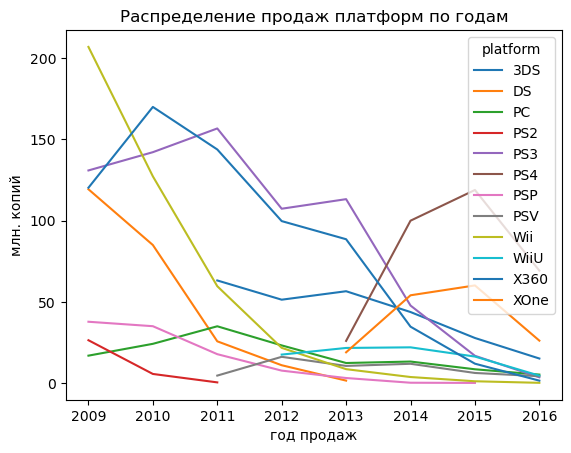

In [27]:
data.loc[(data['year_of_release'] >= 2009)].pivot_table(index = 'year_of_release' ,
                 columns ='platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(kind='line',  title = 'Распределение продаж платформ по годам')

plt.xlabel('год продаж')
plt.ylabel('млн. копий')
plt.show()

на графике в целом видна картина, но сориентироваться что происходит по платформам сложно, дополнительно пострим графики по каждой из платформ:

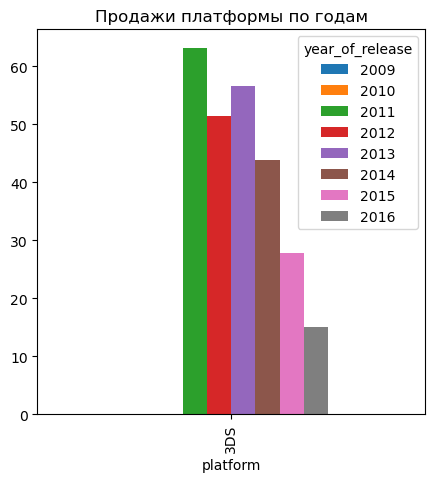

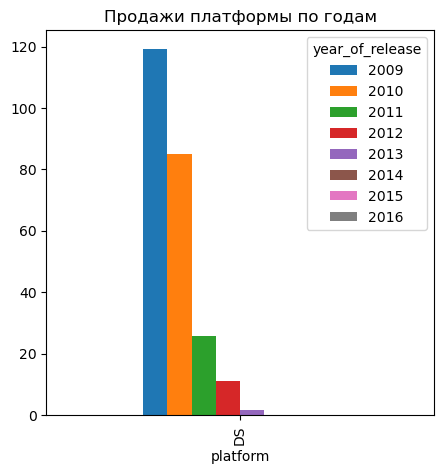

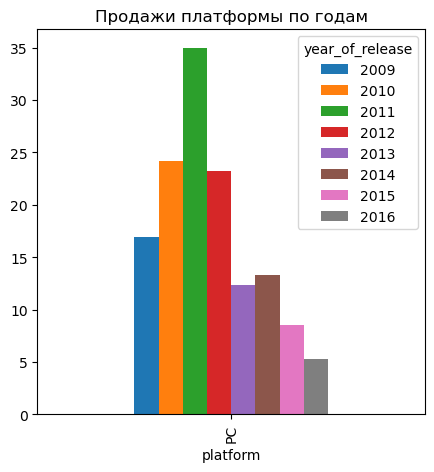

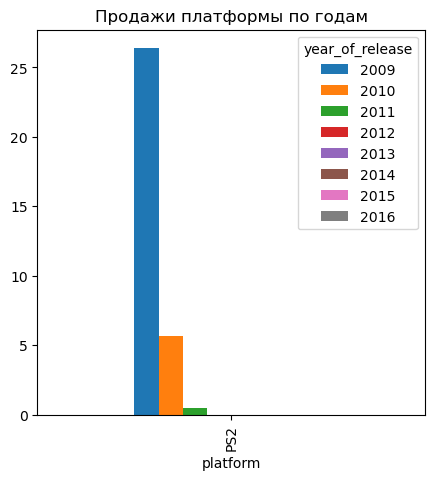

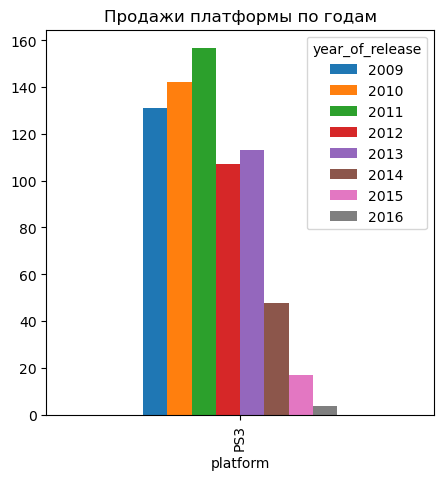

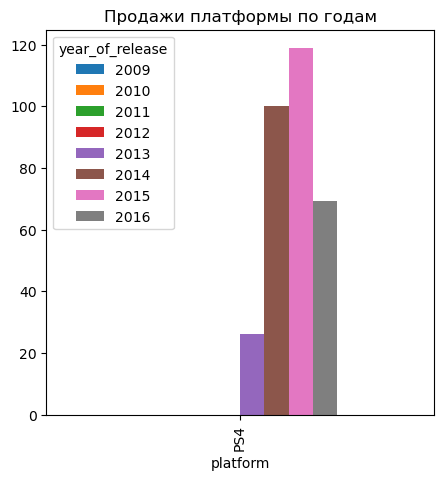

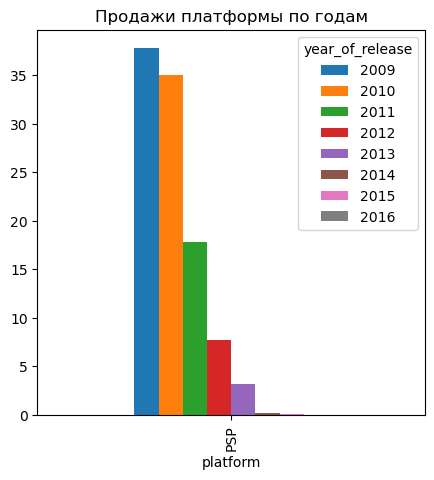

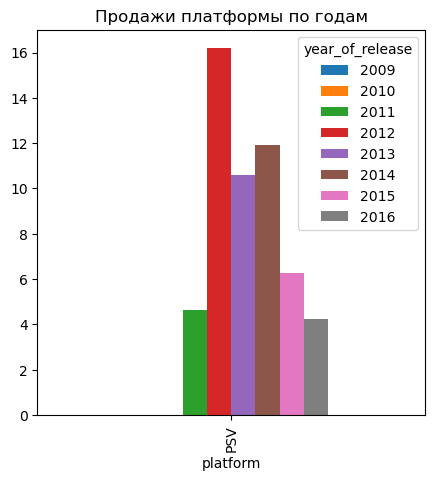

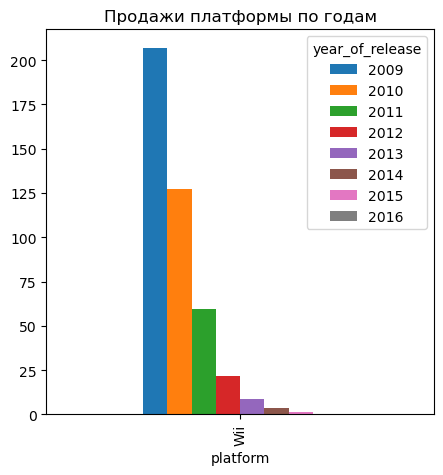

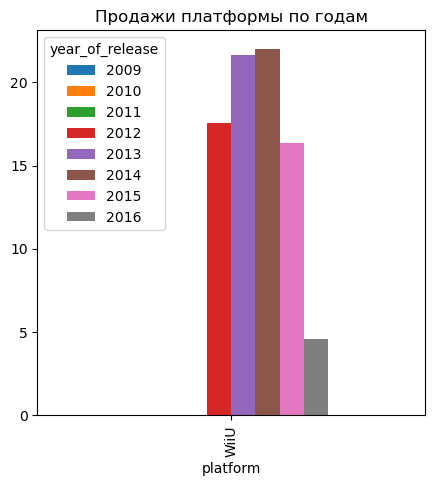

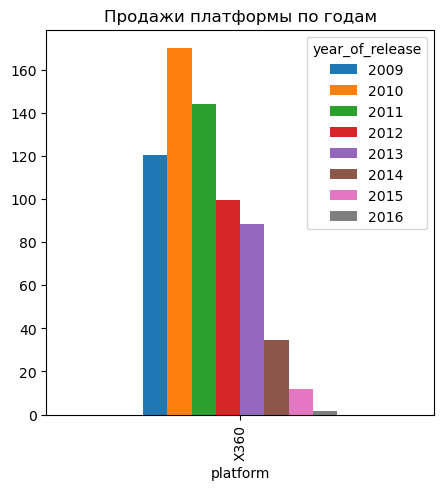

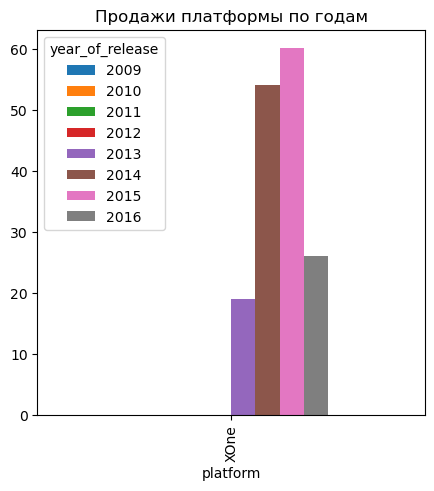

In [28]:
pivot=data.loc[(data['year_of_release'] >= 2009)].pivot_table(index = 'platform',
                 columns = 'year_of_release' ,
                 values = 'total_sales',
                 aggfunc = 'sum').groupby('platform').plot(kind='bar', 
                                                           figsize = (5,5),
                                                           title = 'Продажи платформы по годам',
                                                          )
plt.show()

В среднем  продаж по каждой консоли проходят от 3 до 7 лет, затем они стремятся к нулю или вообще перестают существовать. Тут мы  видим и подтверждаем наши предположения о том, что планировать следующий год опираясь, например, на данные семилетней давности будет не очень актуально, т.к.  некоторые игры уже на закате своей популярности на текущий момент (например, такие как PS3 и Wii). 

Для определение ТОП-а консолей на текущий момент, будем ориентироваться на продажи 2016 года

In [29]:
data.loc[(data['year_of_release'] == 2016)].groupby('platform')['total_sales'].sum().sort_values(ascending = False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

Судя по графику и полученным данным, ТОПом среди консолей в актуальный период будут: PS4, XOne и WiiU.

Теперь рассмтрим график «ящик с усами» по глобальным продажам игр в разбивке по потенциально прибыльным платформам:

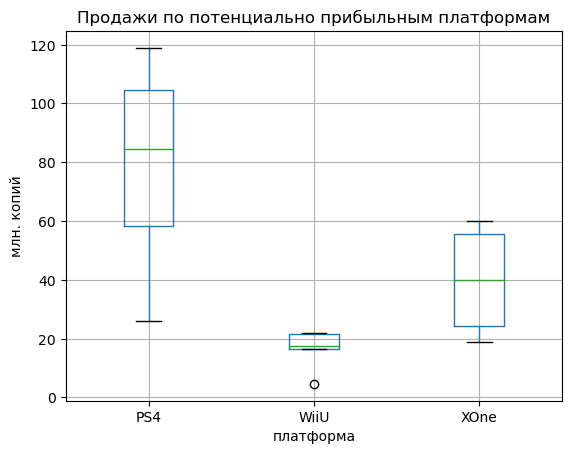

In [30]:
data.query('platform in ["PS4", "XOne","WiiU"]').pivot_table(index='year_of_release', 
                                                                            columns='platform',
                                                                            values='total_sales',
                                                                            aggfunc='sum').boxplot()
plt.title('Продажи по потенциально прибыльным платформам')
plt.xlabel('платформа')
plt.ylabel('млн. копий')
plt.show()

По графику мы видим,  что наибольшей популярностью пользуется PS4, следом идет XOne, а затем уже WiiU и, судя по всему, продажи по  WiiU в последующих годах будет дальше стремиться к нулю, и при планировании продаж стоит это обязательно учесть.


Рассмотрим отзывы пользователей и критиков по популярной на актуальный период платформе PS4:

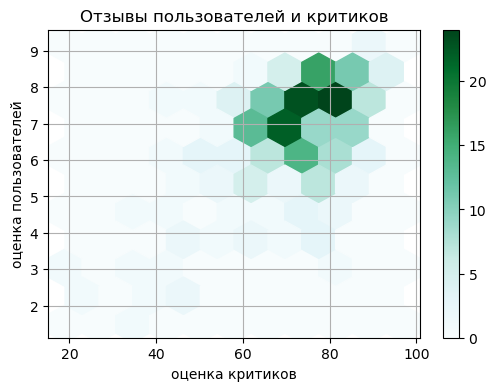

In [31]:
data.query('platform == "PS4"').plot(x='critic_score',
                                     y='user_score',
                                     kind='hexbin',
                                     gridsize=10, 
                                     figsize=(6, 4), 
                                     sharex=False, 
                                     grid=True)

plt.title('Отзывы пользователей и критиков')
plt.xlabel('оценка критиков')
plt.ylabel('оценка пользователей')
plt.show()


По графику видим, что платформу оценили  в среднем на 7-8 баллов. Достаточно высокая оценка. 

Посмотрим, как влияют на продажи внутри PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

In [32]:
data_PS4=data.loc[(data['platform'] == 'PS4')]

In [33]:
print(data_PS4['critic_score'].corr(data_PS4['total_sales']))
print(data_PS4['user_score'].corr(data_PS4['total_sales']))

0.4065679020617816
-0.03195711020455643


AxesSubplot(0.125,0.11;0.775x0.77)


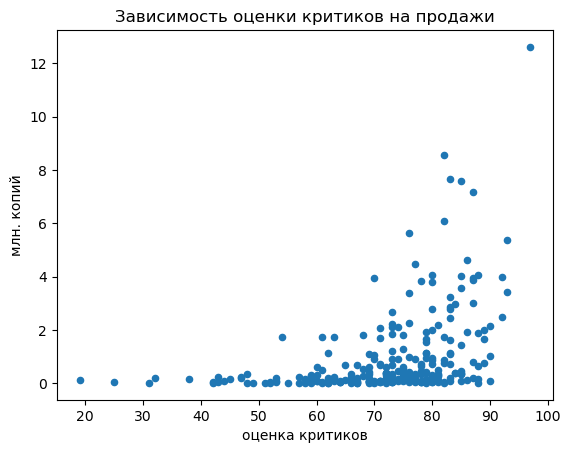

AxesSubplot(0.125,0.11;0.775x0.77)


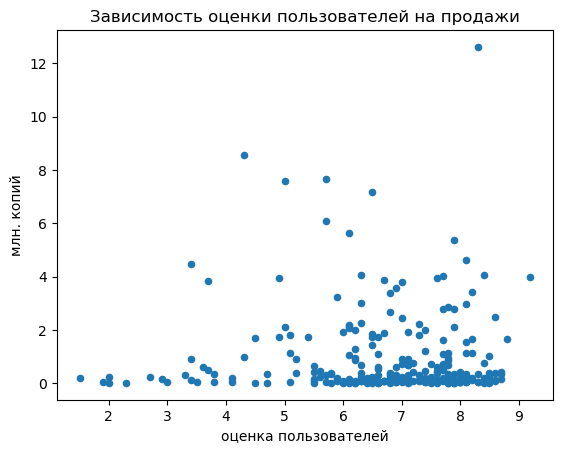

In [34]:
print(data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter') )
plt.title('Зависимость оценки критиков на продажи')
plt.xlabel('оценка критиков')
plt.ylabel('млн. копий')
plt.show()
print(data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter') )
plt.title('Зависимость оценки пользователей на продажи')
plt.xlabel('оценка пользователей')
plt.ylabel('млн. копий')
plt.show()

Здесь мы видим, что связь между оценкой критиков и продажами сильнее, чем у продаж и оценок пользователей . 

Посмотрим , как обстоит дело с другими актуальными платформами XOne и WiiU:

In [35]:
print("XOne")
data_XOne=data.loc[(data['platform'] == 'XOne')]
print(data_XOne['critic_score'].corr(data_XOne['total_sales']))
print(data_XOne['user_score'].corr(data_XOne['total_sales']))
print("------")
print("WiiU")
data_WiiU=data.loc[(data['platform'] == 'WiiU')]
print(data_WiiU['critic_score'].corr(data_WiiU['total_sales']))
print(data_WiiU['user_score'].corr(data_WiiU['total_sales']))

XOne
0.4169983280084017
-0.06892505328279416
------
WiiU
0.34837976012017485
0.4002190202148617


Здесь мы видим похожу картину PS4 с XOne, а вот по консоли WiiU немного другая ситуация, так, например, оценка пользователей уже имеет влияние, небольшое, но всё же. Но все же, чтоит отметить, что  коэффициент = 0.4 говорит о слабой зависимости

Рассмотрим распределение продаж по жанрам:

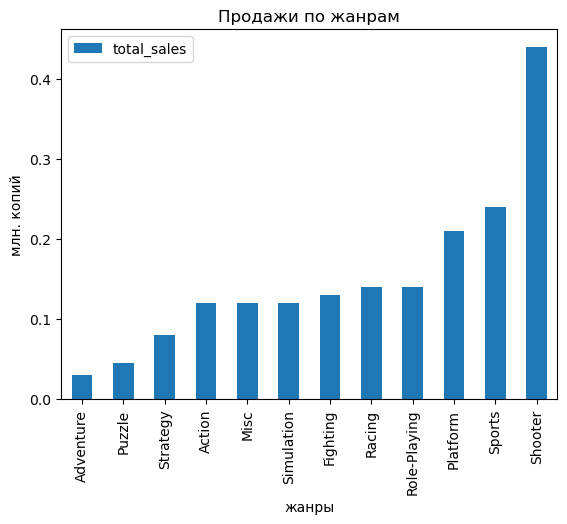

In [36]:
platform_genre_sales = data.loc[(data['year_of_release'] >= 2012)].pivot_table(
                        index='genre',  
                        values='total_sales', 
                        aggfunc='median').sort_values(by = 'total_sales').plot(kind= 'bar')
plt.title('Продажи по жанрам')
plt.ylabel('млн. копий')
plt.xlabel('жанры')

plt.show()

Итак, ТОП - 3 самых продаваемых игр за последние 3 года - это :
*  Shooter 
*  Sports 
*  Platform 

Самые непродаваемые жанры - это Adventure и Pazzle.

**Вывод:** В целом мы видим, что у нас в датасете достаточно большой период с информацией. Изучив подробнее жизненный цикл платформ, мы пришли к выводу, что:
- в среднем платформы живут не более 7 лет.
-  в  динамично меняющейся индустрии, как компьютерные игры не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды.
- актуальные платформы определим по 2016 году 

ТОП-3 на на актуальный период являются такие платформы как:
* PS4, 
* XOne 
* WiiU,

самые популярные жанры - Shooter, Sports и Platform. 

Также мы выявили, что продажи не сильно зависят от оценок пользователей и критиков.

## 3.  Портрет пользователей каждого региона

Рассмотрим самые популярные платформы и жанры в Северной Америке:

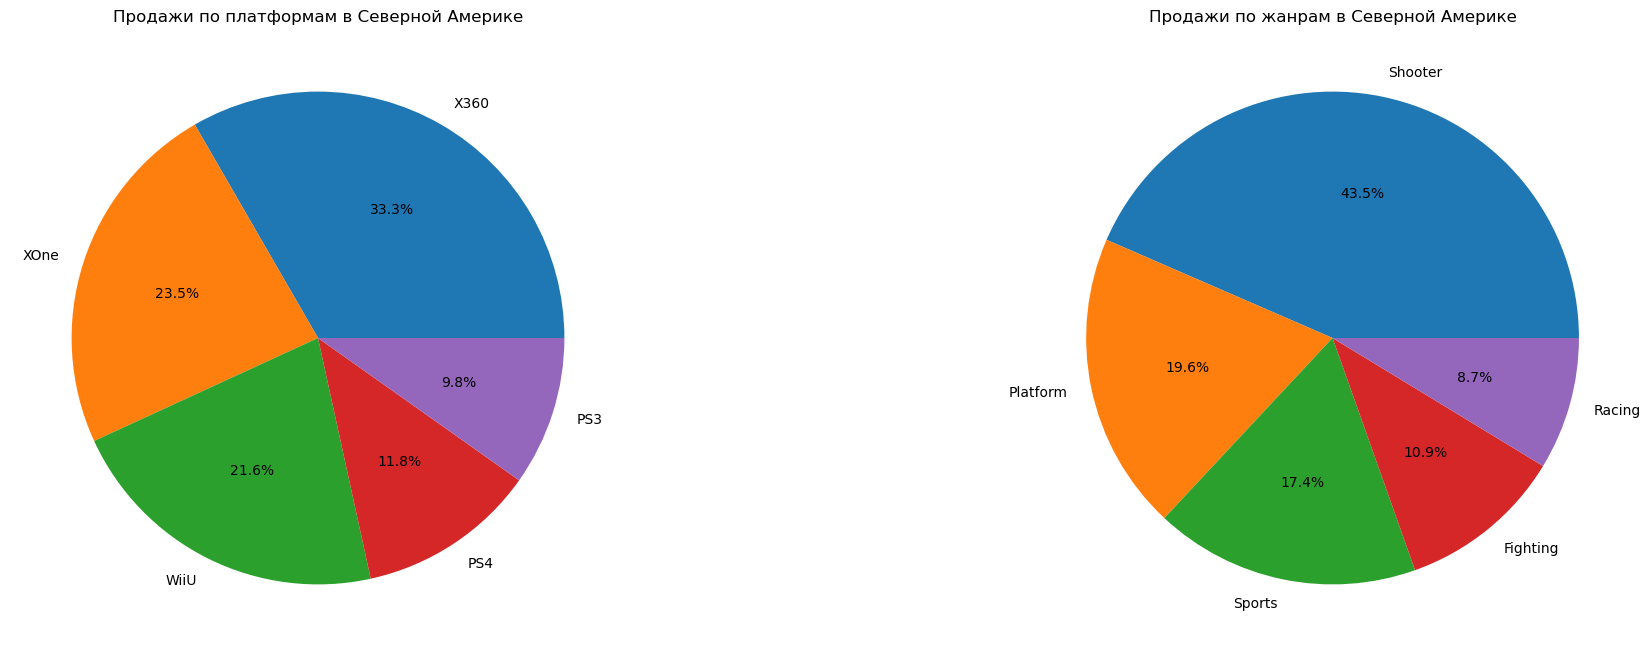

In [37]:
# продажи в Северной Америке  - по платформам
na_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('platform')['na_sales']
 .median()
 .rename('na_sales')
 .reset_index()
 .sort_values(by ='na_sales', ascending = False)
 .head()
 )

# продажи в Северной Америке  - по жанрам
na_genre_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('genre')['na_sales']
 .median()
 .rename('na_genre_sales')
 .reset_index()
 .sort_values(by ='na_genre_sales', ascending = False)
 .head()
 )

fig, (ax1,ax2) = plt.subplots(1,2 , figsize=(24,8))
ax1.pie(x='na_sales', labels = 'platform',  data=na_sales,  autopct='%1.1f%%')
ax2.pie(x='na_genre_sales', labels = 'genre', data=na_genre_sales, autopct='%1.1f%%')

ax1.set_title('Продажи по платформам в Северной Америке')
ax2.set_title('Продажи по жанрам в Северной Америке')
plt.show()

Самой продаваемой платформой в Северной Америке является X360 на замену ей идет XOne. Самым популярными жанрами являются Shooter ( самая популярная игра Halo 4, которая была выпущена в Америке на консоль X360, продается по всему миру кроме Японии) , Platform и Sports. 

In [38]:
na_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby(['name', 'genre'])['na_sales']
 .median()
 .rename('na_sales')
 .reset_index()
 .sort_values(by ='na_sales', ascending = False)
 .head()
 )
na_sales

,name,genre,na_sales
590,Halo 4,Shooter,6.65
1067,Pokemon X/Pokemon Y,Role-Playing,5.28
1063,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Role-Playing,4.35
559,Grand Theft Auto V,Action,3.96
969,New Super Mario Bros. 2,Platform,3.66


Далее рассмотрим Японию:

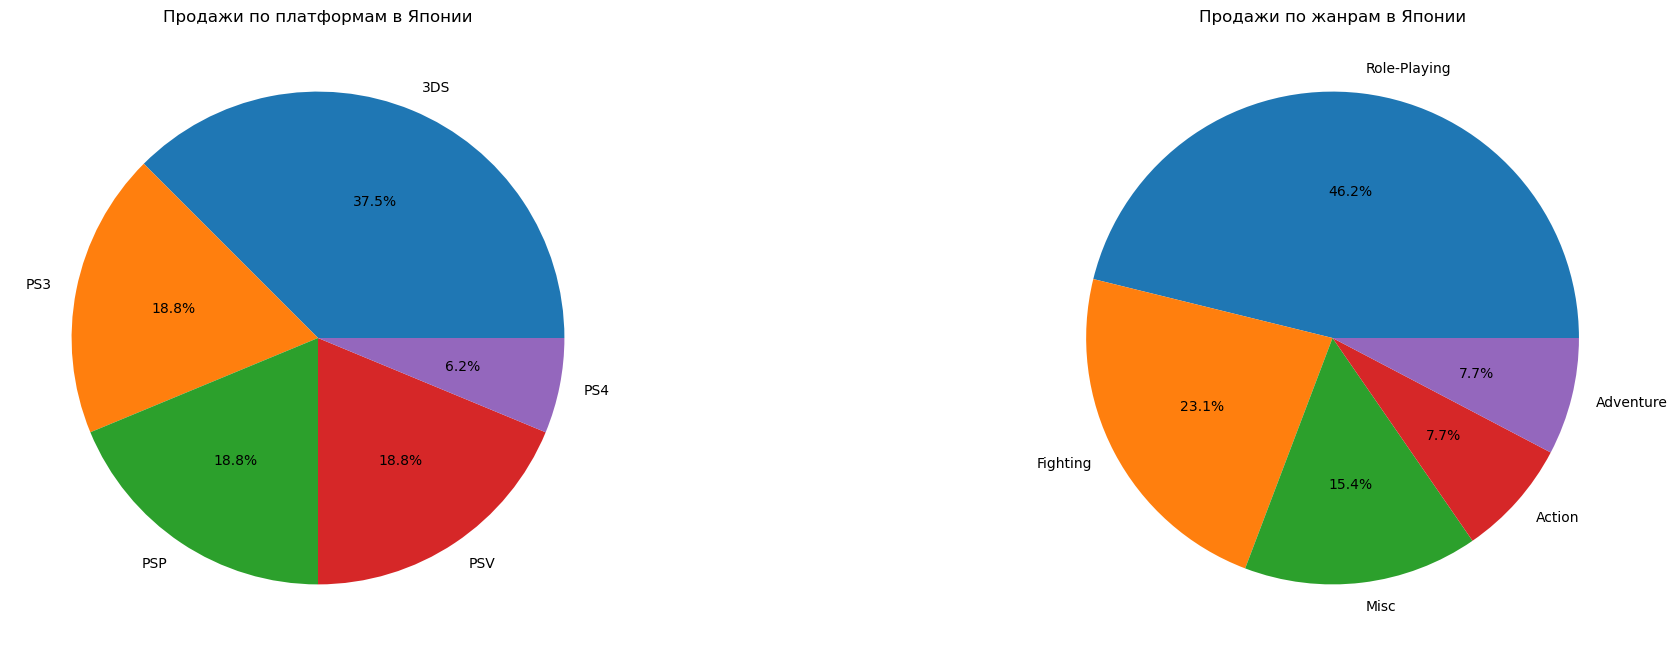

In [39]:
# продажи в Японии  - по платформам
jp_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('platform')['jp_sales']
 .median()
 .rename('jp_sales')
 .reset_index()
 .sort_values(by ='jp_sales', ascending = False)
 .head()
 )

# продажи в Японии  - по жанрам
jp_genre_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('genre')['jp_sales']
 .median()
 .rename('jp_genre_sales')
 .reset_index()
 .sort_values(by ='jp_genre_sales', ascending = False)
 .head()
 )

fig, (ax1,ax2) = plt.subplots(1,2 , figsize=(24,8))
ax1.pie(x='jp_sales', labels = 'platform',  data=jp_sales,  autopct='%1.1f%%')
ax2.pie(x='jp_genre_sales', labels = 'genre', data=jp_genre_sales, autopct='%1.1f%%')

ax1.set_title('Продажи по платформам в Японии')
ax2.set_title('Продажи по жанрам в Японии')
plt.show()

Самая популярная платформа в Японии - 3DS и жанр Pole_Playing. Самой популярной игрой является - Animal Crossing: New Leaf, которая была выпущена в Японии.

In [40]:
jp_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('name')['jp_sales']
 .median()
 .rename('jp_sales')
 .reset_index()
 .sort_values(by ='jp_sales', ascending = False)
 .head()
 )
jp_sales

,name,jp_sales
65,Animal Crossing: New Leaf,4.39
1067,Pokemon X/Pokemon Y,4.35
894,Monster Hunter 4,3.44
1639,Yokai Watch 2 Ganso/Honke,3.18
1060,Pokemon Black 2/Pokemon White 2,3.14


И рассмотрим продажи в Европе:

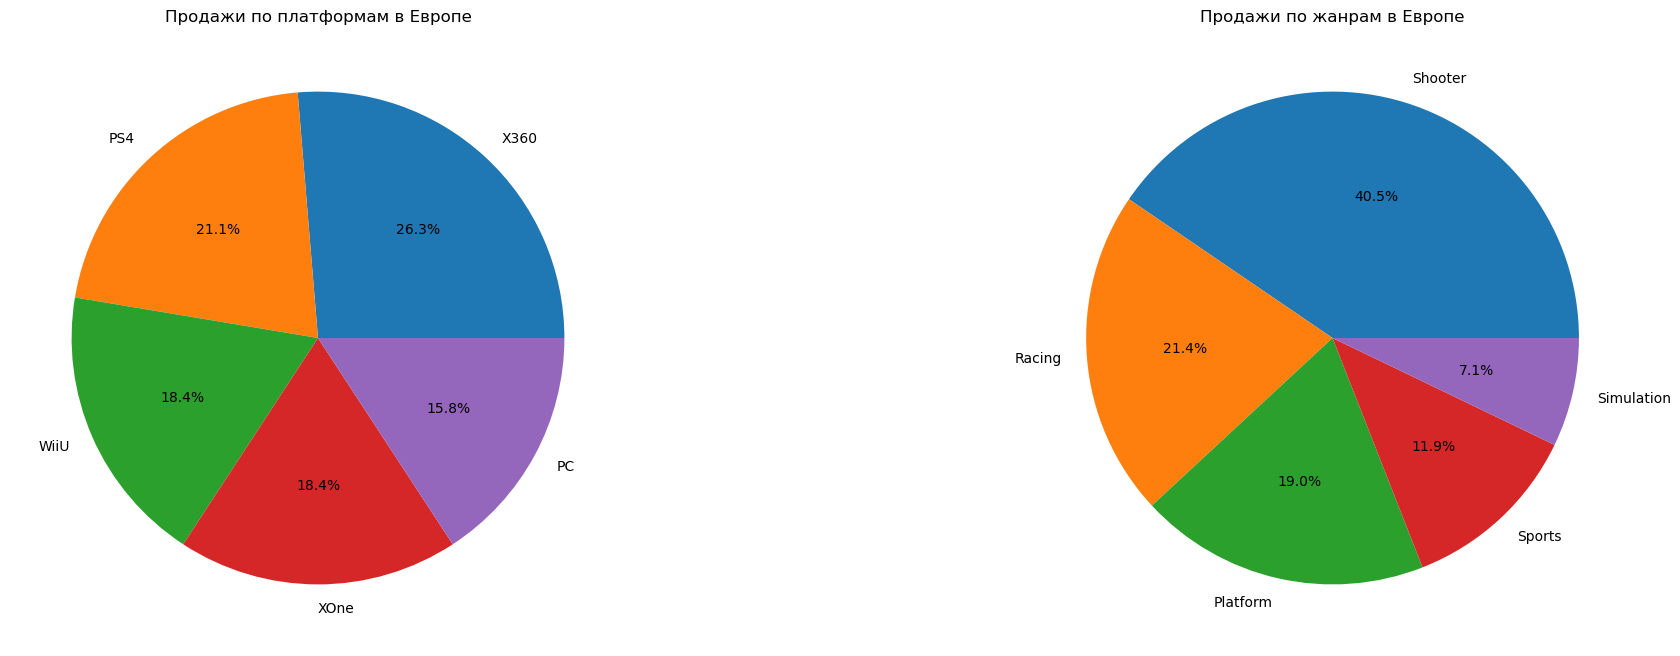

In [41]:
# продажи в Европе - по платформам
eu_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('platform')['eu_sales']
 .median()
 .rename('eu_sales')
 .reset_index()
 .sort_values(by ='eu_sales', ascending = False)
 .head()
 )

# продажи в Европе  - по жанрам
eu_genre_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('genre')['eu_sales']
 .median()
 .rename('eu_genre_sales')
 .reset_index()
 .sort_values(by ='eu_genre_sales', ascending = False)
 .head()
 )

fig, (ax1,ax2) = plt.subplots(1,2 , figsize=(24,8))
ax1.pie(x='eu_sales', labels = 'platform',  data=eu_sales,  autopct='%1.1f%%')
ax2.pie(x='eu_genre_sales', labels = 'genre', data=eu_genre_sales, autopct='%1.1f%%')

ax1.set_title('Продажи по платформам в Европе')
ax2.set_title('Продажи по жанрам в Европе')
plt.show()

На первых позициях в Европе консоли X360, PS4  и WiiU. Самым популярным жанром ( как и во всех странах ) ялвяется Shooter, а самой популярной игрой Grand Theft Auto V ( которая была разработана в России)

In [42]:
eu_sales=(data.loc[(data['year_of_release'] >= 2012)].groupby('name')['eu_sales']
 .median()
 .rename('eu_sales')
 .reset_index()
 .sort_values(by ='eu_sales', ascending = False)
 .head()
 )
eu_sales

,name,eu_sales
559,Grand Theft Auto V,5.14
1067,Pokemon X/Pokemon Y,4.19
1063,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3.49
969,New Super Mario Bros. 2,3.14
1559,Uncharted 4: A Thief's End,2.50


Из вышеизложенного, мы видим, что самыми популярными играми являются локальные продукты, однако нельзя не заметить, что во всех регионах мы видим общемировые игры, такие как Покемон и СуперМарио. 

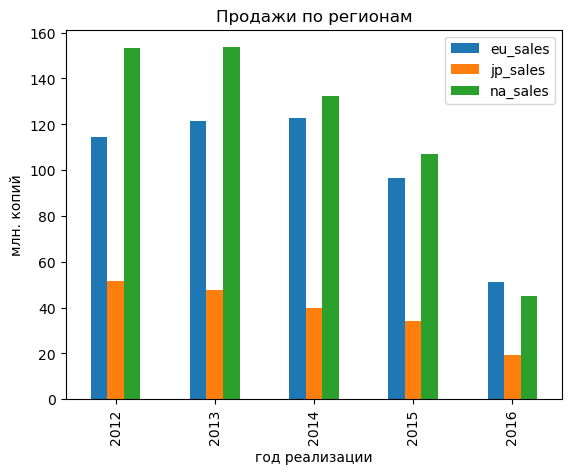

In [43]:
sales_data = data[[x for x in data.columns if 'sales' in x] + ['year_of_release']]
sales_data=sales_data.loc[(data['year_of_release'] >= 2012)].pivot_table(index = 'year_of_release', values = ['na_sales', 'eu_sales','jp_sales'], aggfunc = 'sum').plot(kind=('bar'))


plt.title('Продажи по регионам')
plt.ylabel('млн. копий')
plt.xlabel('год реализации')
plt.show()

Основной рынок продаж явлется Северная Америка и Европа. 

Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе:

In [44]:
na_rating = (data.loc[(data['year_of_release'] >= 2012)].groupby('rating')['na_sales']
 .sum()
 .rename('na_sales')
 .reset_index()
 .sort_values(by ='na_sales', ascending = False)
 .head()
 )
print('Сумма продаж игр по рейтингу ESRB  в Северной Америке:')
print()
print(na_rating)

print()

eu_rating = (data.loc[(data['year_of_release'] >= 2012)].groupby('rating')['eu_sales']
 .sum()
 .rename('eu_sales')
 .reset_index()
 .sort_values(by ='eu_sales', ascending = False)
 .head()
 )
eu_rating

print('Сумма продаж игр по рейтингу ESRB  в Европе:')
print()
print(eu_rating)

print()
jp_rating = (data.loc[(data['year_of_release'] >= 2012)].groupby('rating')['jp_sales']
 .sum()
 .rename('jp_sales')
 .reset_index()
 .sort_values(by ='jp_sales', ascending = False)
 .head()
 )
jp_rating

print('Сумма продаж игр по рейтингу ESRB  в Японии:')
print()
print(jp_rating)


Сумма продаж игр по рейтингу ESRB  в Северной Америке:

    rating  na_sales
2        M    231.57
0        E    114.37
4  unknown    103.31
1     E10+     75.70
3        T     66.02

Сумма продаж игр по рейтингу ESRB  в Европе:

    rating  eu_sales
2        M    193.96
0        E    113.03
4  unknown     91.50
1     E10+     55.37
3        T     52.96

Сумма продаж игр по рейтингу ESRB  в Японии:

    rating  jp_sales
4  unknown    108.84
0        E     28.33
3        T     26.02
2        M     21.20
1     E10+      8.19


Исходя из того, что рейтинг ESRB был разработан для программного обеспечения в США и Канаде, мы набюдаем логичную картину, что значительную долю продаж в Европе и Америке занимает рейтинга `M`(для взрослых), а вот уже в Японии продажи игр с данным рейтингом не вошли в топ , потому что, как мы ранее выяснили, у каждого региона любимая игра - это локальная игра, которая больше подходит под менталитет и культуру страны. 

**Вывод:** Исследуя пользователя, мы видим что в Северной Америке и в Европе пользователи с большего похожи между собой (если брать укрупненно), пользователи Японии отличаются по предпочтениям. 

В каждом регионе есть своя любимая игра и она чаще всего  "местная- известная".

Проанализировав все регионы, мы видим что основной рынок пользователей - это Северная Америка и Европа, и при дальнейших расчетах стоит учесть предпочтение именно этих пользователей. 

## 4. Проверка основных гипотез

**Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**

H_0: Средний пользовательский рейтинг (user_score) платформы "Xbox One" = среднему пользовательскому рейтингу (user_score) платформы "PC"
H_a: Средний пользовательский рейтинг (user_score) платформы "Xbox One" ≠ среднему пользовательскому рейтингу (user_score) платформы "PC"

alpha = 0.05

In [45]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [46]:
from scipy import stats as st

In [47]:
data_gip=data.loc[(data['year_of_release'] >= 2012)]
Xbox = list(data_gip[data_gip['platform'] == 'XOne']['user_score'])
PC = list(data_gip[data_gip['platform'] == 'PC']['user_score'])

results = st.ttest_ind(Xbox,PC, equal_var= False, nan_policy = 'omit')

alpha=.05
 
print(results.pvalue)

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134987
Не получилось отвергнуть нулевую гипотезу


In [48]:
#data_gip.pivot_table(index='platform', values='user_score', aggfunc = 'mean').sort_values(by='user_score')

Средняя пользовательская оценка между "Xbox One" и "PC" не значительно отличается. Гипотеза подтвердилась,  рейтинг у платформ почти одинаковый

**Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные:**

H_0: Средний пользовательский рейтинг (user_score) жанра "Action" ≠ среднему пользовательскому рейтингу (user_score) платформы "Sports"     
H_a: Средний пользовательский рейтинг (user_score) жанра "Action" = среднему пользовательскому рейтингу (user_score) платформы "Sports"

alpha = 0.05

In [49]:
data_gip=data.loc[(data['year_of_release'] >= 2012)]
Action = list(data_gip[data_gip['genre'] == 'Action']['user_score'])
Sports= list(data_gip[data_gip['genre'] == 'Sports']['user_score'])

results = st.ttest_ind(Action,Sports,equal_var= False, nan_policy = 'omit')

alpha=.05
 
print(results.pvalue)

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

4.24307776572644e-20
Отвергаем нулевую гипотезу


Разница в средних пользовательских оценках по жанру Action в отличии от Sports значительная. Гипотеза не подтверждена.

In [50]:
#data_gip.pivot_table(index='genre', values='user_score', aggfunc = 'mean').sort_values(by='user_score')

**Вывод:** Изучив гипотезы можно сделать вывод, что оценки это индивидуальная категория. Однако, что касаемо более укрупненных категорий, например, таких как платформы  Xbox и PC, то в среднем оценки не сильно отличаются друг от друга, а вот если уже брать непосредственно сами игры и в частности их категории, то видим, что предпочтения очень разнятся, оценки это отражают, так , жанру Sports пользователи отдают предпочтение жанру Action.

# Общий вывод

Исследуя данные данного датасета , мы увидили, что у нас достаточно большой период с информацией. Изучив подробнее жизненный цикл платформ, мы пришли к выводу, что в среднем платформы живут не более 7 лет. Для определения потенциально прибыльных платформ мы взяли ТОП актуальных платформ из 2016 года, саму динамику продаж платформ рассмотрели с 2012 года.

В ходе исследования мы пришли к выводу, что основаные пользователи платформ живут в Северной Америке и Европе, самый интересный жанр оказался Shooter. В целом пользователи более ориентированы на игры, которые создавались у них в регионе.

Чтобы диверсифицировать риски, мы предлагаем пресмотрется к таким платформам как: PS4, XOne и WiiU и жанрам игр: Shooter, Sports и Platform. 

Что касается рейтинга по возрасту, то у нас представлен рейтинг от организации ESRB (он покрывает в основном США и Канаду), для того, чтобы рассмотреть,например, возраст пользователя нам не хватает информации. Возможно следует уточнить, есть ли в базах рейтинг из других организаций. По имеющимся данным, основные пользователи платформ - это взрослые (17+)    

Также, в ходе исследования, было уточнено, что при будущем планировании не следует опираться на оценки пользователей или критиков, т.к. их зависимость не очень велика.

Рассмотрев гипотезы по оценкам пользователей платформы Xbox и PC, мы увидели, что в среднем оценки не сильно отличаются друг от друга, а вот если уже брать непосредственно сами игры и в частности их категории, то видим, что предпочтения очень разнятся, оценки это отражают, так, жанру Sports пользователи более высоко оценивают жанр Action. Из чего можно сделать вывод, что к нашему топу жанров следует ещё добавить рекомендуемый жанр - Action.
